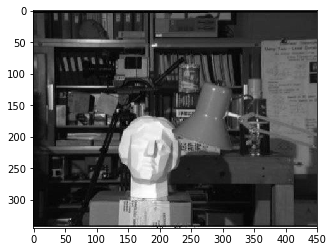

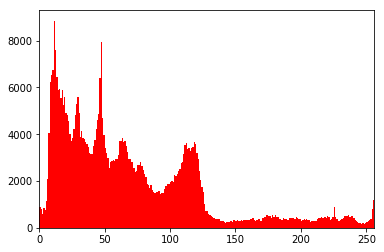

In [19]:
## code to plot histogram in pythonimport numpy as np
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

img = cv2.imread('images/head.jpg')

# Display the images
plt.imshow(img) 
plt.show()

#display the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [11]:
def histogram_equalization(img_in):

# segregate color streams
    b,g,r = cv2.split(img_in)
    
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
    
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
    
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
    
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

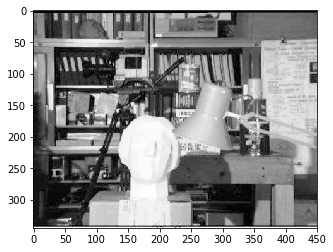

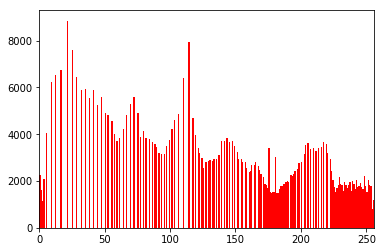

In [12]:
img_out = histogram_equalization(img)

# Display the images
plt.imshow(img_out) 
plt.show()

#display the histogram
hist,bins = np.histogram(img_out.flatten(),256,[0,256])
plt.hist(img_out.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

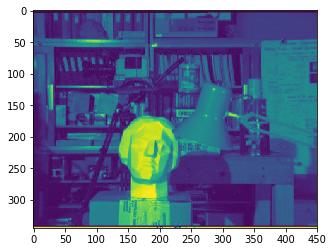

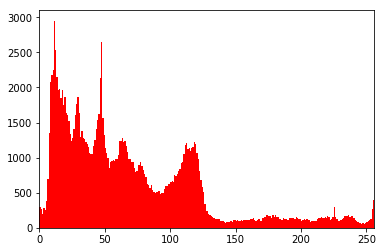

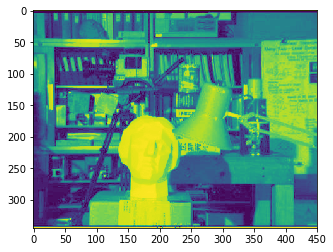

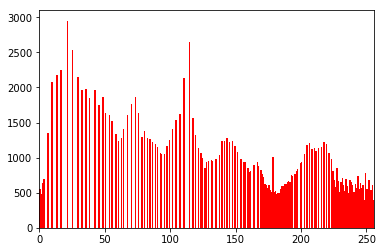

In [17]:
#using opencv built-in function


img = cv2.imread('images/head.jpg', 0)

# Display the images
plt.imshow(img) 
plt.show()
#display histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

#histogram equalization
equ = cv2.equalizeHist(img)

#display image
plt.imshow(equ) 
plt.show()
#display histogram
hist,bins = np.histogram(equ.flatten(),256,[0,256])
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

#res = np.vstack((img,equ)) #stacking images side-by-side
